In [99]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as plot
import seaborn as sns
import matplotlib.font_manager as fm
%matplotlib inline

# 폰트지정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 18

# 폰트를 지정하면 그래프에서 마이너스 폰트가 깨져서 다음과 같이 셋팅
mpl.rcParams['axes.unicode_minus'] = False

### 최근 5개월 리뷰수 시각화

In [111]:
df = pd.read_csv('D:/pythonTest/DataShipJo/chi_data_fin.csv', names=['가게명','총평점','주소','아이디','평점','date','review'])
df.head()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,가게명,총평점,주소,아이디,평점,date,review
1,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,oo**님,4.666666667,1시간 전,NaN
2,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,de**님,1,2시간 전,잘 먹었습니다
3,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,pr**님,4.666666667,4시간 전,양이 많이 줄어든 느낌 이네요.
4,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,sk**님,4.666666667,8시간 전,오늘도 맛나게 잘 먹었습니다~~~
5,BHC-시립대점,4.8,서울특별시 동대문구 전농동 295-9 성진빌딩 295-9 동광교회 1층,gh**님,4.666666667,10시간 전,맛있어요 양도 많아요


In [112]:
df.drop(df[['가게명','총평점','주소','아이디','평점']], axis=1, inplace=True)

In [113]:
df.isna().sum()

date      2189
review    4627
dtype: int64

In [114]:
df.dropna(inplace=True)

In [115]:
df.isna().sum()

date      0
review    0
dtype: int64

In [116]:
# dateType으로 변환을 위함2 :: '년,월' 제거 후 '-' 삽입
df["date"] = df["date"].str.replace(pat=r'[년월]', repl=r'-', regex=True)

In [117]:
# dateType으로 변환을 위함1 :: '일', 공백 제거
df["date"] = df["date"].str.replace(pat=r'[일 ]', repl=r'', regex=True)

In [118]:
# 최근 5개월 리뷰수 lately_y 값에 저장하기

lately_12 = len(df[df['date'].str.contains('2021-12')])
lately_1 = len(df[df['date'].str.contains('2022-01')])
lately_2 = len(df[df['date'].str.contains('2022-02')])
lately_3 = len(df[df['date'].str.contains('2022-03')])
lately_4 = len(df[df['date'].str.contains('2022-04')])

lately_y = [lately_4, lately_3, lately_2, lately_1, lately_12]
lately_y

[1794, 3123, 3075, 2862, 2952]

In [119]:
# 최근 5개월 lately_x 값에 저장
lately_x = ['2021-12','2022-01','2022-02','2022-03','2022-04']
lately_x

['2021-12', '2022-01', '2022-02', '2022-03', '2022-04']

C:\Users\USER\AppData\Local\Temp/ipykernel_516/1031652449.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-co" (-> color='c'). The keyword argument will take precedence.
  ax1_.plot(lately_x,lately_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')


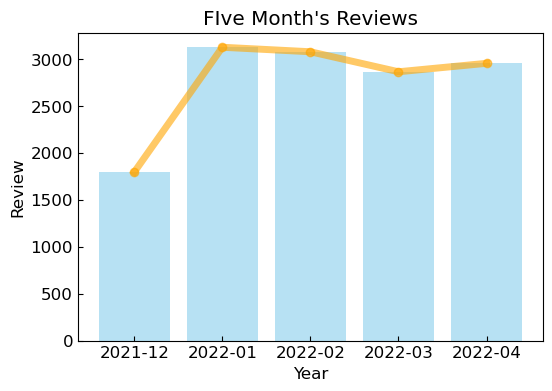

In [120]:
# 최근 5개월 리뷰수 시각화

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

fig, ax1_ = plt.subplots()

ax1_.plot(lately_x,lately_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')
#ax1.set_ylim(0,18)
ax1_.set_xlabel('Year')
ax1_.set_ylabel('Review')
ax1_.tick_params(axis='both', direction='in')


#ax2_ = ax1_.twinx()
ax1_.bar(lately_x,lately_y, color='skyblue', alpha=0.6, label='Review')
ax1_.tick_params(axis='y', direction='in')

# 그래프 순서 정하기 :: 막대 그래프 뒤로 배치
ax1_.set_zorder(ax1_.get_zorder()+10)
ax1_.patch.set_visible(False)

plt.title("FIve Month's Reviews")
plt.show()

## 연도별 리뷰수 시각화

In [121]:
# 2015~2022년도 리뷰수 year_y 값에 저장
year_15 = len(df[df['date'].str.contains('2015')])
year_16 = len(df[df['date'].str.contains('2016')])
year_17 = len(df[df['date'].str.contains('2017')])
year_18 = len(df[df['date'].str.contains('2018')])
year_19 = len(df[df['date'].str.contains('2019')])
year_20 = len(df[df['date'].str.contains('2020')])
year_21 = len(df[df['date'].str.contains('2021')])
year_22 = len(df[df['date'].str.contains('2022')])

year_y = [year_15, year_16, year_17, year_18, year_19, year_20, year_21, year_22]
year_y

[503, 1012, 3830, 10896, 21102, 24690, 28908, 10854]

In [122]:
# 2015~2022년도 year_x 값에 저장
year_x = ['2015','2016','2017','2018','2019','2020','2021','2022']
year_x

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

C:\Users\USER\AppData\Local\Temp/ipykernel_516/770060465.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-co" (-> color='c'). The keyword argument will take precedence.
  ax2_.plot(year_x,year_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')


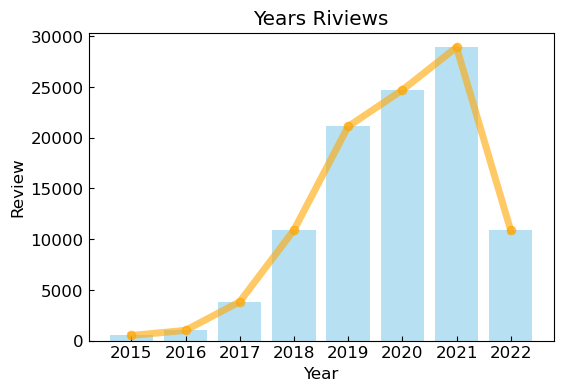

In [123]:
# 최근 5개월 리뷰수 시각화

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

fig, ax2_ = plt.subplots()

ax2_.plot(year_x,year_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')
#ax1.set_ylim(0,18)
ax2_.set_xlabel('Year')
ax2_.set_ylabel('Review')
ax2_.tick_params(axis='both', direction='in')


#ax2_ = ax1_.twinx()
ax2_.bar(year_x,year_y, color='skyblue', alpha=0.6, label='Review')
ax2_.tick_params(axis='y', direction='in')

# 그래프 순서 정하기 :: 막대 그래프 뒤로 배치
ax2_.set_zorder(ax2_.get_zorder()+10)
ax2_.patch.set_visible(False)

plt.title("Years Riviews")
plt.show()